In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np

uploaded = files.upload()
train_data = pd.read_csv('train-perceptron.txt', sep=" " ,  
                         header = None, dtype = 'Float64')


Saving train-perceptron.txt to train-perceptron.txt


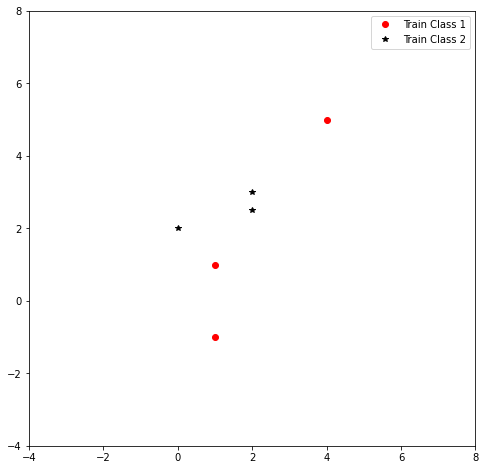

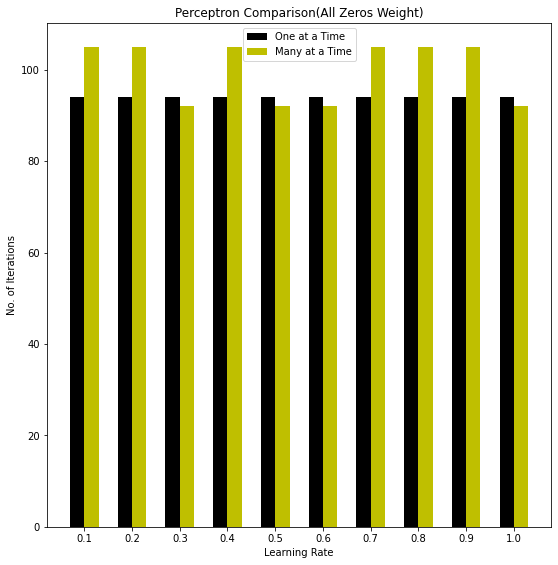

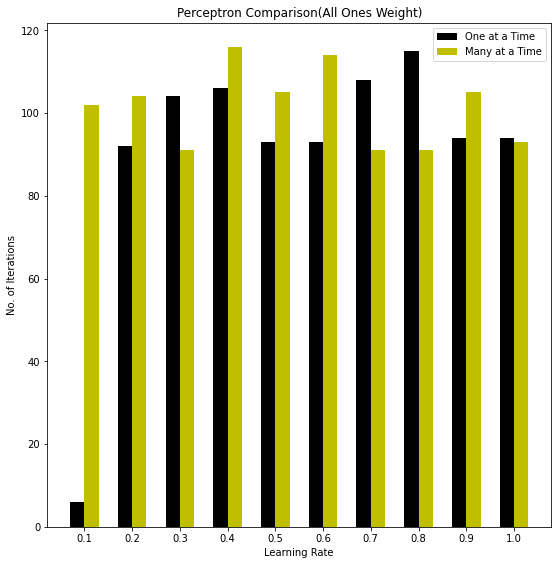

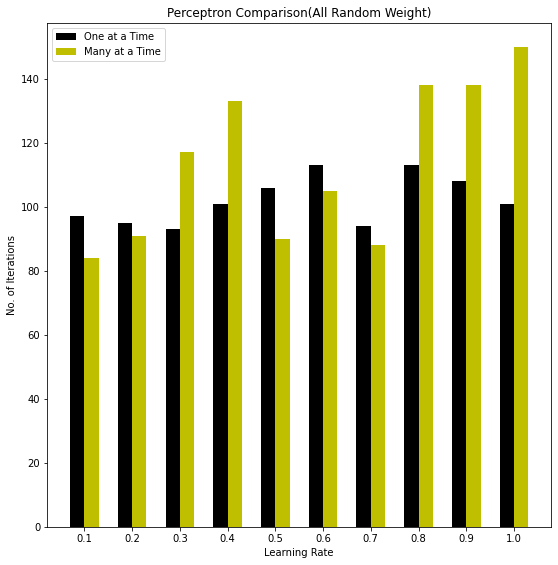

For Weight=All Zeroes:
+---------------+---------------+--------------+
| Learning Rate | Single Update | Batch Update |
+---------------+---------------+--------------+
|      0.1      |       94      |     105      |
|      0.2      |       94      |     105      |
|      0.3      |       94      |      92      |
|      0.4      |       94      |     105      |
|      0.5      |       94      |      92      |
|      0.6      |       94      |      92      |
|      0.7      |       94      |     105      |
|      0.8      |       94      |     105      |
|      0.9      |       94      |     105      |
|      1.0      |       94      |      92      |
+---------------+---------------+--------------+
For Weight=All Ones:
+---------------+---------------+--------------+
| Learning Rate | Single Update | Batch Update |
+---------------+---------------+--------------+
|      0.1      |       6       |     102      |
|      0.2      |       92      |     104      |
|      0.3      |      10

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))

x1_x=[]
x1_y=[]
x2_x=[]
x2_y=[]
label=[]

#SEPARATING TRAIN DATA INTO 2 CLASSES
for i in range(len(train_data[0])):
  if train_data[2][i]==1:
    x1_x.append(train_data[0][i])
    x1_y.append(train_data[1][i])
    
  else:
    x2_x.append(train_data[0][i])
    x2_y.append(train_data[1][i])



#PLOTTING TRAIN DATA
plt.plot(x1_x,x1_y,'ro',label='Train Class 1')
plt.plot(x2_x,x2_y,'k*',label='Train Class 2')
plt.legend()
plt.xlim([-4,8])
plt.ylim([-4,8])
#GENERATING HIGHER DIMENSION SAMPLE POINTS AND NORMALIZING CLASS 2
y1=[]
y2=[]
for i in range(len(x1_x)):
  y1.append([x1_x[i]*x1_x[i],x1_y[i]*x1_y[i],x1_x[i]*x1_y[i],x1_x[i],x1_y[i],1])
for i in range(len(x2_x)):
  y2.append([-x2_x[i]*x2_x[i],-x2_y[i]*x2_y[i],-x2_x[i]*x2_y[i],
             -x2_x[i],-x2_y[i],-1])
  

y=[]
y.extend(y1)
y.extend(y2)

########################### BATCH UPDATE #######################################

iteration_per_learningRate_batchUpdate=[]

init_weight=[]

init_weight.append(np.zeros(6))
init_weight.append(np.ones(6))
np.random.seed(10)
init_weight.append(np.random.random((6)))


misclassified_count=-1
iteration=0

for weight_count in range(len(init_weight)):
  iteration_counter=[]
  for learning_rate in [learning_rate * 0.1 for learning_rate in range(1, 11)]:
    while misclassified_count!=0:
      iteration=iteration+1
      misclassified_count=0
      y_sum=np.zeros(6)
      for i in range(len(y)):
        wTy=np.dot(y[i],init_weight[weight_count])
        if wTy<=0:
          misclassified_count=misclassified_count+1
          y_sum=y_sum+y[i]

      if misclassified_count>0:
        init_weight[weight_count]=init_weight[weight_count]+learning_rate*y_sum

    iteration_counter.append(iteration)
    misclassified_count=-1
    iteration=0
    if weight_count==0:
      init_weight[weight_count] = np.zeros(6)
    elif weight_count==1:
      init_weight[weight_count] = np.ones(6)
    else:
      np.random.seed(10)
      init_weight[weight_count] = np.random.random((6))
  iteration_per_learningRate_batchUpdate.append(iteration_counter)


###########################SINGLE UPDATE#######################################
iteration_per_learningRate_singleUpdate=[]
init_weight[0]=np.zeros(6)
init_weight[1]=np.ones(6)
np.random.seed(10)
init_weight[2]=np.random.random((6))
misclassified_count=-1
iteration=0

for weight_count in range(len(init_weight)):
  iteration_counter=[]
  for learning_rate in [learning_rate * 0.1 for learning_rate in range(1, 11)]:
    while misclassified_count!=0:
      iteration=iteration+1
      misclassified_count=0
      y_sum=np.zeros(6)
      for i in range(len(y)):
        wTy=np.dot(y[i],init_weight[weight_count])
        if wTy<=0:
          misclassified_count=misclassified_count+1
          y_sum=y_sum+y[i]
          init_weight[weight_count]=init_weight[weight_count]+learning_rate*y_sum
        y_sum=np.zeros(6)  
    
    iteration_counter.append(iteration)
    misclassified_count=-1
    iteration=0
    if weight_count==0:
      init_weight[weight_count] = np.zeros(6)
    elif weight_count==1:
      init_weight[weight_count] = np.ones(6)
    else:
      np.random.seed(10)
      init_weight[weight_count] = np.random.random((6))
  iteration_per_learningRate_singleUpdate.append(iteration_counter)


x_axis=np.arange(0.1, 10.1, 1)
x_ticks=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
titles=["Perceptron Comparison(All Zeros Weight)","Perceptron Comparison(All Ones Weight)","Perceptron Comparison(All Random Weight)"]

############################# PLOTING BAR GRAPHS################################
for i in range(3):
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_axes([0,0,1,1])
  ax.set_title(titles[i])
  ax.bar(x_axis, iteration_per_learningRate_singleUpdate[i], color = 'k', width = 0.3,label='One at a Time')
  ax.bar(x_axis+.30, iteration_per_learningRate_batchUpdate[i], color = 'y', width = 0.3,label='Many at a Time')
  plt.xticks(x_axis+0.15, x_ticks)
  plt.legend()
  ax.set_xlabel('Learning Rate')
  ax.set_ylabel('No. of Iterations')
  plt.show()


####################### DRAWING TABLES #########################################
from prettytable import PrettyTable
t0 = PrettyTable(['Learning Rate','Single Update', 'Batch Update'])
t1 = PrettyTable(['Learning Rate','Single Update', 'Batch Update'])
t_rand = PrettyTable(['Learning Rate','Single Update', 'Batch Update'])

for i in range(10):
  t0.add_row([x_ticks[i], iteration_per_learningRate_singleUpdate[0][i],iteration_per_learningRate_batchUpdate[0][i]])
  t1.add_row([x_ticks[i], iteration_per_learningRate_singleUpdate[1][i],iteration_per_learningRate_batchUpdate[1][i]])
  t_rand.add_row([x_ticks[i], iteration_per_learningRate_singleUpdate[2][i],iteration_per_learningRate_batchUpdate[2][i]])
print("For Weight=All Zeroes:")
print(t0)
print("For Weight=All Ones:")
print(t1)
print("For Weight=Random with seed=10:")
print(t_rand)